# Research Pathway 2 - Wanqing Hu

Uncomment and run the below cell only if you have not installed `oracledb` package.

In [6]:
# try:
#     %pip install --user "oracledb" --no-warn-script-location
# except Exception as e:
#     print("\x1b[31m\u2717 Unexpected error! Please contact course staff\n" +
#          "Please include the entire text above and below in your message.")
#     raise

In [7]:
# Import packages
import oracledb
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_wanqing1", password="a65768004", dsn=dsn)

In [9]:
cur = connection.cursor()

## SQL queries to pull data and perform analysis

In [11]:
cur.execute("""
    CREATE OR REPLACE VIEW year_county_avg AS
    SELECT YEAR, COUNTY, AVG(OBSRATE_ICD10) AS avg_rate
    FROM COUNTIES
    GROUP BY YEAR, COUNTY
""")

In [12]:
cur.execute("""
CREATE OR REPLACE VIEW max_rate_each_year AS
SELECT y.YEAR AS year, y.COUNTY AS county, y.avg_rate AS avg_rate
FROM year_county_avg y
JOIN (SELECT YEAR, MAX(avg_rate) AS max_rate FROM year_county_avg GROUP BY YEAR) m
ON y.year=m.YEAR AND y.avg_rate=m.max_rate
""")

In [13]:
for row in cur.execute('SELECT county, COUNT(*) AS count FROM max_rate_each_year GROUP BY county HAVING COUNT(*)>3'):
    print(row)

('Yuba', 5)


## Visualization of results

In [15]:
for row in cur.execute('SELECT * FROM max_rate_each_year'):
    print(row)

(2020, 'Butte', 151.05)
(2018, 'Yuba', 207.325)
(2017, 'Yuba', 204.8)
(2019, 'Yuba', 179.925)
(2016, 'Yuba', 174.85)
(2022, 'Yuba', 163.15)
(2021, 'Merced', 182.625)


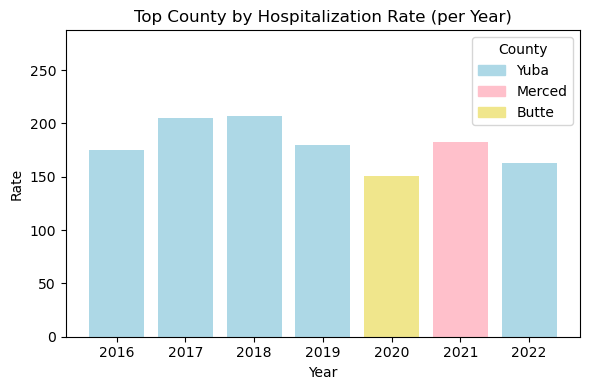

In [16]:
data = [
    (2020, 'Butte', 151.05),
    (2018, 'Yuba', 207.325),
    (2017, 'Yuba', 204.8),
    (2019, 'Yuba', 179.925),
    (2016, 'Yuba', 174.85),
    (2022, 'Yuba', 163.15),
    (2021, 'Merced', 182.625)
]

df = pd.DataFrame(data, columns=['Year', 'County', 'Rate'])
df.sort_values('Year', inplace=True)

custom_colors = {
    'Yuba': 'lightblue',
    'Merced': 'pink',
    'Butte': 'khaki'
}
df['Color'] = df['County'].map(custom_colors)

plt.figure(figsize=(6, 4))
plt.bar(df['Year'].astype(str), df['Rate'], color=df['Color'])

handles = [plt.Rectangle((0, 0), 1, 1, color=custom_colors[c]) for c in custom_colors]
plt.legend(handles, custom_colors.keys(), title='County')

plt.title('Top County by Hospitalization Rate (per Year)')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.ylim(0, df['Rate'].max() + 80)
plt.tight_layout()
plt.show()

This bar plot indicates the highest diabetes-related hospitalization rate and its corresponding county by year.

In [18]:
cur.close()
connection.close()